In [4]:
import numpy as np
from pandas_ml_utils import pd
from pandas_ml_utils.constants import *
import matplotlib.pyplot as plt


merging of cross folded models is not supported, we just keep training the same model


0.736408593657702


<AxesSubplot:>

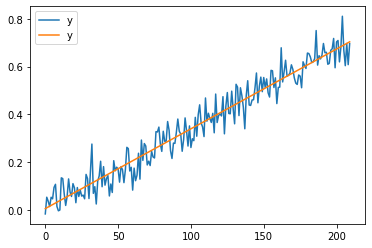

In [76]:
def create_line_data(n=300, slope=1):
    np.random.seed(32)
    x = np.linspace(0, 1, n)
    y = slope * x + np.random.normal(0, 0.05, n)
    return x, y


df = pd.DataFrame(np.array(create_line_data(300)).T, columns=["x", "y"])
with df.model() as m:
    from sklearn.linear_model import LinearRegression
    from pandas_ml_utils import FeaturesAndLabels, SkModel

    model = SkModel(LinearRegression(), FeaturesAndLabels(["x"], ["y"]))
    fit = m.fit(model)
    y = fit.training_summary.df[LABEL_COLUMN_NAME].values
    y_hat = fit.training_summary.df[PREDICTION_COLUMN_NAME].values
    dist = np.sqrt(np.sum((y - y_hat) ** 2))

print(dist)
ax = fit.training_summary.df[LABEL_COLUMN_NAME].plot()
fit.training_summary.df[PREDICTION_COLUMN_NAME].plot(ax=ax)

In [ ]:
df = pd.DataFrame(np.array(create_line_data(300)).T, columns=["x", "y"])
with df.model() as m:
    from sklearn.neural_network import MLPRegressor
    from pandas_ml_utils import FeaturesAndLabels, SkModel

    model = SkModel(MLPRegressor(10, activation='identity', learning_rate_init=0.1, max_iter=5000, validation_fraction=0), FeaturesAndLabels(["x"], ["y"]))
    fit = m.fit(model)
    y = fit.training_summary.df[LABEL_COLUMN_NAME].values
    y_hat = fit.training_summary.df[PREDICTION_COLUMN_NAME].values
    dist = np.sqrt(np.sum((y - y_hat) ** 2))

print(dist)
ax = fit.training_summary.df[LABEL_COLUMN_NAME].plot()
fit.training_summary.df[PREDICTION_COLUMN_NAME].plot(ax=ax)

merging of cross folded models is not supported, we just keep training the same model


1.0687251771311723


<AxesSubplot:>

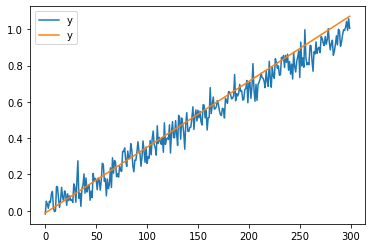

In [109]:
df = pd.DataFrame(np.array(create_line_data(300)).T, columns=["x", "y"])
with df.model() as m:
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import KFold
    from pandas_ml_utils import FeaturesAndLabels, SkModel, dummy_splitter

    model = SkModel(MLPRegressor(10, activation='identity', learning_rate_init=0.1, max_iter=5000, validation_fraction=0), FeaturesAndLabels(["x"], ["y"]))
    fit = m.fit(model, cross_validation=KFold(2), splitter=dummy_splitter)
    y = fit.training_summary.df[LABEL_COLUMN_NAME].values
    y_hat = fit.training_summary.df[PREDICTION_COLUMN_NAME].values
    dist = np.sqrt(np.sum((y - y_hat) ** 2))

print(dist)
ax = fit.training_summary.df[LABEL_COLUMN_NAME].plot()
fit.training_summary.df[PREDICTION_COLUMN_NAME].plot(ax=ax)


/home/kic/sources/private/projects/pandas-quant/pandas-ml-utils/pandas_ml_utils/ml/model/base_model.py:120: RuntimeWarning: Mean of empty slice.
  test_loss = np.array([self.calculate_loss(fold, x, y, w) for x, y, w in test_data if len(x) > 0]).mean()
/home/kic/sources/private/projects/pandas-quant/.venv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
merging of cross folded models is not supported, we just keep training the same model


8.759030859712512


<AxesSubplot:>

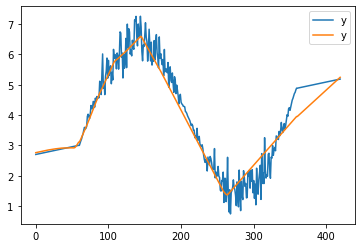

In [86]:
def create_sine_data(n=300):
    np.random.seed(32)
    x = np.linspace(0, 1 * 2 * np.pi, n)
    y1 = 3 * np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1 + np.random.normal(0, 0.15 * np.abs(y1), n), np.zeros(60)))
    x = np.concatenate((np.linspace(-3, 0, 60), np.linspace(0, 3 * 2 * np.pi, n),
                        np.linspace(3 * 2 * np.pi, 3 * 2 * np.pi + 3, 60)))
    y2 = 0.1 * x + 1
    y = (y1 + y2) + 2
    return x, y

df = pd.DataFrame(np.array(create_sine_data(300)).T, columns=["x", "y"])
with df.model() as m:
    from sklearn.neural_network import MLPRegressor
    from pandas_ml_utils import FeaturesAndLabels, SkModel, dummy_splitter

    model = SkModel(MLPRegressor(200, learning_rate_init=0.001, max_iter=5000, validation_fraction=0), FeaturesAndLabels(["x"], ["y"]))
    fit = m.fit(model, splitter=dummy_splitter)
    y = fit.training_summary.df[LABEL_COLUMN_NAME].values
    y_hat = fit.training_summary.df[PREDICTION_COLUMN_NAME].values
    dist = np.sqrt(np.sum((y - y_hat) ** 2))

print(dist)
ax = fit.training_summary.df[LABEL_COLUMN_NAME].plot()
fit.training_summary.df[PREDICTION_COLUMN_NAME].plot(ax=ax)